# Trending YouTube Video Statistics

### В этом ноутбуке я исследовал датасет "Trending YouTube..." на разные статистические показатели 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

### Для начала посмотрим на различные показатели на примере данных одной страны

In [2]:
ru = pd.read_csv(r'C:\Users\polia\ananahui\youtube\RUvideos.csv', engine='python')

###### Проверим, все ли в порядке с файлом

In [3]:
display(ru.head())
print(ru.columns)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,gDuslQ9avLc,17.14.11,Р—Р°С…Р°СЂ Рё РџРѕР»РёРЅР° СѓС‡Р°С‚СЃСЏ СЌРєРѕ...,РўвЂ”Р– Р‘РћР“РђР§,22,2017-11-13T09:09:31.000Z,"Р·Р°С…Р°СЂ Рё РїРѕР»РёРЅР°|""СѓС‡РёРјСЃСЏ СЌРєР...",62408,334,190,50,https://i.ytimg.com/vi/gDuslQ9avLc/default.jpg,False,False,False,"Р—РЅР°РєРѕРјСЊС‚РµСЃСЊ, СЌС‚Рѕ Р—Р°С…Р°СЂ Рё Р..."
1,AOCJIFEA_jE,17.14.11,Р‘РёСЂР¶Р° РњРµРјРѕРІ #29. Р‘РѕР»СЊС€РѕРёМ† РІ...,Druzhko Show,22,2017-11-13T17:32:11.000Z,"Р±РёСЂР¶Р° РјРµРјРѕРІ|""Р»РµРІ С€Р°РіРёРЅСЏРЅ""|...",330043,43841,2244,2977,https://i.ytimg.com/vi/AOCJIFEA_jE/default.jpg,False,False,False,Р’ 29 РІС‹РїСѓСЃРєРµ Р”СЂСѓР¶РєРѕ РЁРѕСѓ РЎРµС...
2,VAWNQDgwwOM,17.14.11,РҐРђР™Рџ РљР­РњРџ - РЎР’РћР™ РЎР Р•Р”Р� Р§РЈР–...,Р®Р»РёРє,24,2017-11-13T16:11:31.000Z,"СЋРјРѕСЂ|""РєРѕРјРµРґРёСЏ""|""РІР»РѕРі""|""Р±Р»РѕРі...",424596,49854,714,2944,https://i.ytimg.com/vi/VAWNQDgwwOM/default.jpg,False,False,False,http://kapitany.ru/!Yulik.cap - Р¤Р°РєСѓР»СЊС‚...
3,gknkFwKQfHg,17.14.11,РЎРѕС‡РЅР°СЏ РєРµСЃР°РґРёР»СЊСЏ СЃ РєСѓСЂРёС†РµР№,Hochland,22,2017-11-13T06:51:10.000Z,"С…РѕС…Р»Р°РЅРґ|""СЃС‹СЂ""|""СЂРµС†РµРїС‚С‹""|""РєР°...",112851,3566,122,80,https://i.ytimg.com/vi/gknkFwKQfHg/default.jpg,False,False,False,*** РєР°Рє РіРѕС‚РѕРІРёС‚СЊ СЂРµСЃС‚РѕСЂР°РЅРЅ...
4,3sYvZcwzZr8,17.14.11,РљР›Р�РџР« Р РћР”Р�РўР•Р›Р•Р™ РќРђ РЁРљРћР›Р¬Р...,РЎРѕРІРµСЂРіРѕРЅ,24,2017-11-13T16:52:36.000Z,"РЎРѕРІРµСЂРіРѕРЅ|""Sovergon""|""РєР»РёРїС‹""|""СЂРѕ...",243469,36216,631,1692,https://i.ytimg.com/vi/3sYvZcwzZr8/default.jpg,False,False,False,вќЏ РљРћРќРљРЈР РЎ РљРђРџР�РўРђРќР«: http://ka...


Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')


###### Как мы видим, кодировка на некоторых файлах "полетела", поэтому придется обойтись без RUvideos, JPvideos, KRvideos и MXvideos

In [4]:
gb = pd.read_csv(r'C:\Users\polia\ananahui\youtube\GBvideos.csv')
display(gb.head())
print(gb.columns)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...
1,3s1rvMFUweQ,17.14.11,Taylor Swift: …Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs …Ready for...
2,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
3,PUTEiSjKwJU,17.14.11,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,17,2017-11-13T02:30:38.000Z,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12,37,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,False,False,False,Salford drew 4-4 against the Class of 92 and F...
4,rHwDegptbI4,17.14.11,Dashcam captures truck's near miss with child ...,Cute Girl Videos,25,2017-11-13T01:45:13.000Z,[none],9815,30,2,30,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,False,False,False,Dashcam captures truck's near miss with child ...


Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')


###### Сразу же добавим к датасету категории видео, это понадобится нам позже

In [12]:
id_to_category = {}
with open("C:/Users/polia/Downloads/datasets_4549_466349_GB_category_id.json" , 'r') as f:
    data = json.load(f)
    for category in data['items']:
        id_to_category[category['id']] = category['snippet']['title']
gb['category'] = gb['category_id'].map(id_to_category)

gb['category_id'] = gb['category_id'].astype(str) # это также поможет нам в дальнейшем

###### Для начала исследуем корреляцию между просмотрами и лайками 

In [6]:
# Уменьшим количество колонок, между которыми будем искать корреляции
correlation_list = ['views', 'likes', 'dislikes']
hm_data = gb[correlation_list].corr() 
display(hm_data)
# Здесь 1 - положительная корреляция, -1 - отрицательная, 0 - ее отсутствие 

,views,likes,dislikes
views,1.000000,0.795862,0.392407
likes,0.795862,1.000000,0.446746
dislikes,0.392407,0.446746,1.000000


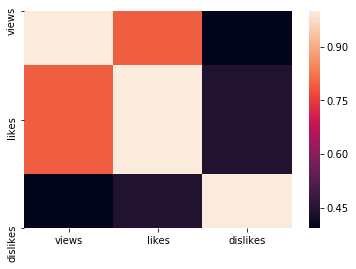

In [7]:
# Визуализируем полученные данные; здесь чем светлее цвет - тем выше корреляция 
sns.heatmap(hm_data)

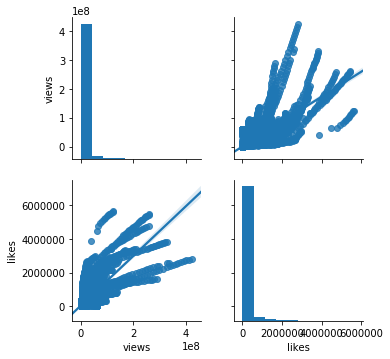

In [8]:
# Построим pairplot
sns.pairplot(gb[['views', 'likes']], kind='reg')

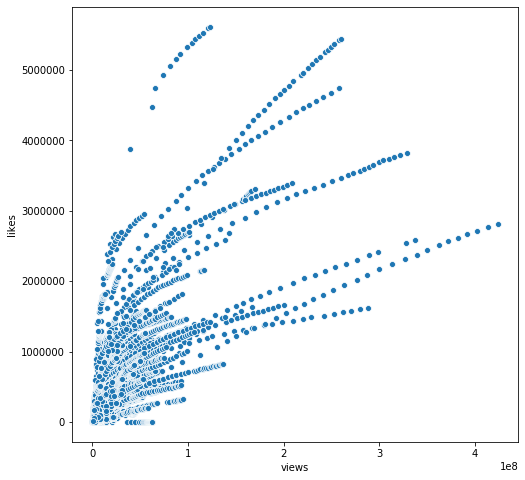

In [9]:
# Рассмотрим на scatterplot зависимость лайки/просмотры детальнее
plt.figure(figsize=(8,8))
sns.scatterplot(x = gb ['views'], y = gb['likes'])

###### Посмотрим, какие 10 каналов чаще всего попадали в "тренды"

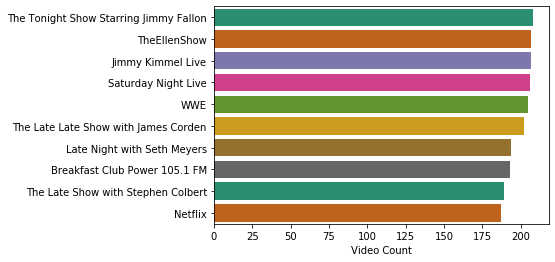

In [10]:
by_channel = gb.groupby(["channel_title"]).size().sort_values(ascending = False).head(10)
sns.barplot(by_channel.values, by_channel.index.values, palette = "Dark2")
plt.xlabel("Video Count")
plt.show()

###### Посмотрим, какие категории чаще всего были в "трендах"

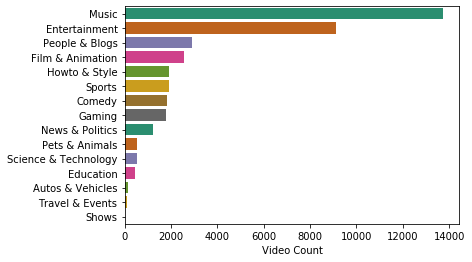

In [13]:
by_cat = gb.groupby(["category"]).size().sort_values(ascending = False)
sns.barplot(by_cat.values, by_cat.index.values, palette = "Dark2")
plt.xlabel("Video Count")
plt.show() 

###### Объединим два показателя и посмотрим, какие из категорий в "трендах" имели больший зрительский успех

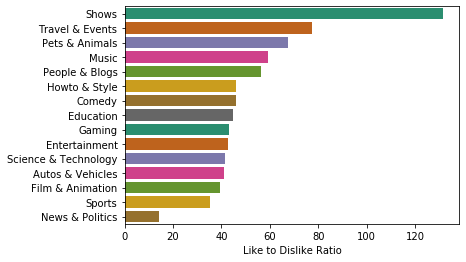

In [14]:
gb["ldratio"] = gb["likes"] / gb["dislikes"] # Добавим новый параметр - отношение лайков к дизлайкам
like_category = gb[gb["dislikes"] != 0].groupby("category").mean().sort_values(by = "ldratio", ascending = False)
sns.barplot(like_category["ldratio"], like_category.index.values, palette = "Dark2")
plt.xlabel("Like to Dislike Ratio")
plt.show()

### Теперь перейдем к рассмотрению данных по всем странам вместе

In [15]:
ca = pd.read_csv(r'C:\Users\polia\ananahui\youtube\CAvideos.csv', usecols=correlation_list) # используем старую переменную, чтобы сразу отсечь ненужные нам колонки
de = pd.read_csv(r'C:\Users\polia\ananahui\youtube\DEvideos.csv', usecols=correlation_list)
fr = pd.read_csv(r'C:\Users\polia\ananahui\youtube\FRvideos.csv', usecols=correlation_list)
gb = pd.read_csv(r'C:\Users\polia\ananahui\youtube\GBvideos.csv', usecols=correlation_list)
In = pd.read_csv(r'C:\Users\polia\ananahui\youtube\INvideos.csv', usecols=correlation_list)
us = pd.read_csv(r'C:\Users\polia\ananahui\youtube\GBvideos.csv', usecols=correlation_list)

In [16]:
df = [ca, de, fr, gb, In, us]
df_names = ['Canada', 'Germany', 'France', 'Great Brittain', 'India', 'United States'] 

###### Рассмотрим те же зависимости, что и ранее

In [23]:
views = pd.DataFrame(columns=['views', 'likes', 'dislikes'])
likes = pd.DataFrame(columns=['views', 'likes', 'dislikes'])

count = 0
while count != 6:
    print(df_names[count])
    current_df = df[count]
    _x = current_df[correlation_list].corr()
    display(_x)
    views.loc[count] = _x.loc['views']
    likes.loc[count] = _x.loc['likes']
    count += 1

Canada


,views,likes,dislikes
views,1.000000,0.828964,0.557621
likes,0.828964,1.000000,0.460427
dislikes,0.557621,0.460427,1.000000


Germany


,views,likes,dislikes
views,1.000000,0.824189,0.556000
likes,0.824189,1.000000,0.460208
dislikes,0.556000,0.460208,1.000000


France


,views,likes,dislikes
views,1.000000,0.812569,0.586997
likes,0.812569,1.000000,0.450548
dislikes,0.586997,0.450548,1.000000


Great Brittain


,views,likes,dislikes
views,1.000000,0.795862,0.392407
likes,0.795862,1.000000,0.446746
dislikes,0.392407,0.446746,1.000000


India


,views,likes,dislikes
views,1.000000,0.850096,0.543294
likes,0.850096,1.000000,0.494560
dislikes,0.543294,0.494560,1.000000


United States


,views,likes,dislikes
views,1.000000,0.795862,0.392407
likes,0.795862,1.000000,0.446746
dislikes,0.392407,0.446746,1.000000


In [24]:
views = views.drop(axis=1, labels='views') # убираем лишнюю колонку
views.index = df_names
display(views) # Посмотрим на объединенные данные

,likes,dislikes
Canada,0.828964,0.557621
Germany,0.824189,0.556000
France,0.812569,0.586997
Great Brittain,0.795862,0.392407
India,0.850096,0.543294
United States,0.795862,0.392407


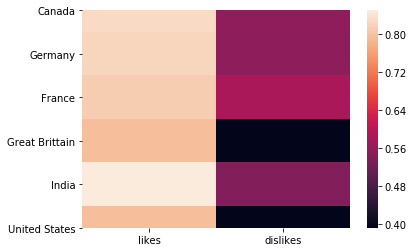

In [19]:
sns.heatmap(views)

In [25]:
likes = likes.drop(axis=1, labels='likes') # убираем лишнюю колонку
likes.index = df_names
display(likes) # Посмотрим на объединенные данные

,views,dislikes
Canada,0.828964,0.460427
Germany,0.824189,0.460208
France,0.812569,0.450548
Great Brittain,0.795862,0.446746
India,0.850096,0.494560
United States,0.795862,0.446746


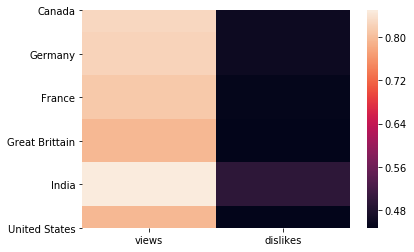

In [26]:
sns.heatmap(likes)